In [1]:
import nltk
from nltk.tokenize import word_tokenize
import torch

nltk.download('punkt')  # one-time download

# ❶ Sample corpus (you can add more sentences later)
corpus = [
    "fido loves the red ball",
    "timmy and fido go to the park"
]

# ❷ Build vocabulary
tokens = sorted({w for s in corpus for w in word_tokenize(s.lower())})
token2idx = {w:i for i,w in enumerate(tokens)}

# ❸ Co-occurrence matrix
window = 2
co_matrix = torch.zeros((len(tokens), len(tokens)))
for s in corpus:
    words = word_tokenize(s.lower())
    for i, cw in enumerate(words):
        for j in range(max(0, i-window), min(len(words), i+window+1)):
            if i!=j:
                co_matrix[token2idx[cw], token2idx[words[j]]] += 1

print("Tokens:", tokens)
print("Co-matrix shape:", co_matrix.shape)


Tokens: ['and', 'ball', 'fido', 'go', 'loves', 'park', 'red', 'the', 'timmy', 'to']
Co-matrix shape: torch.Size([10, 10])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rohitrajpoot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# ❶ Define an embedding layer
embed_dim = 8
embedding = torch.nn.Embedding(len(tokens), embed_dim)

# ❷ (Optional) A quick “training” step could go here – for now we save the initial weights
torch.save(embedding.weight.data, "tensor.pt")
print("Saved tensor.pt with shape", embedding.weight.data.shape)


Saved tensor.pt with shape torch.Size([10, 8])


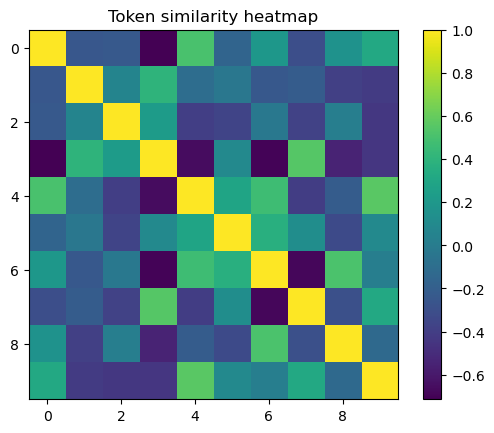

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

vecs = embedding.weight.data.numpy()
sim = cosine_similarity(vecs)
plt.imshow(sim, cmap="viridis")
plt.colorbar()
plt.title("Token similarity heatmap")
plt.show()
